# Dataset

In [1]:
import fiftyone as fo

### Create the dataset
https://voxel51.com/docs/fiftyone/user_guide/dataset_creation/datasets.html

In [2]:
name = "traffic_sign-light"

In [4]:
dataset_dir = "dataset/"
splits = ["train"]

dataset = fo.Dataset(name)

for split in splits:
    dataset.add_dir(
        dataset_dir=dataset_dir,
        dataset_type=fo.types.YOLOv5Dataset,
        split=split,
        tags=split,
)

 100% |███████████████| 3497/3497 [3.7s elapsed, 0s remaining, 1.0K samples/s]       


### Load the dataset

In [3]:
dataset = fo.load_dataset(name)

ValueError: Dataset 'traffic_sign-light' not found

### Make the daatset persistent
https://voxel51.com/docs/fiftyone/user_guide/using_datasets.html#dataset-persistence

In [27]:
dataset.persistent = True

### Summary of the dataset

In [ ]:
print(dataset)

In [ ]:
len(dataset)

### Launch the dataset
http://localhost:5151/

In [5]:
session = fo.launch_app(dataset)

### List the datasets

In [ ]:
fo.list_datasets()

### Delete the dataset

In [4]:
fo.delete_dataset(name)

### Clear Session


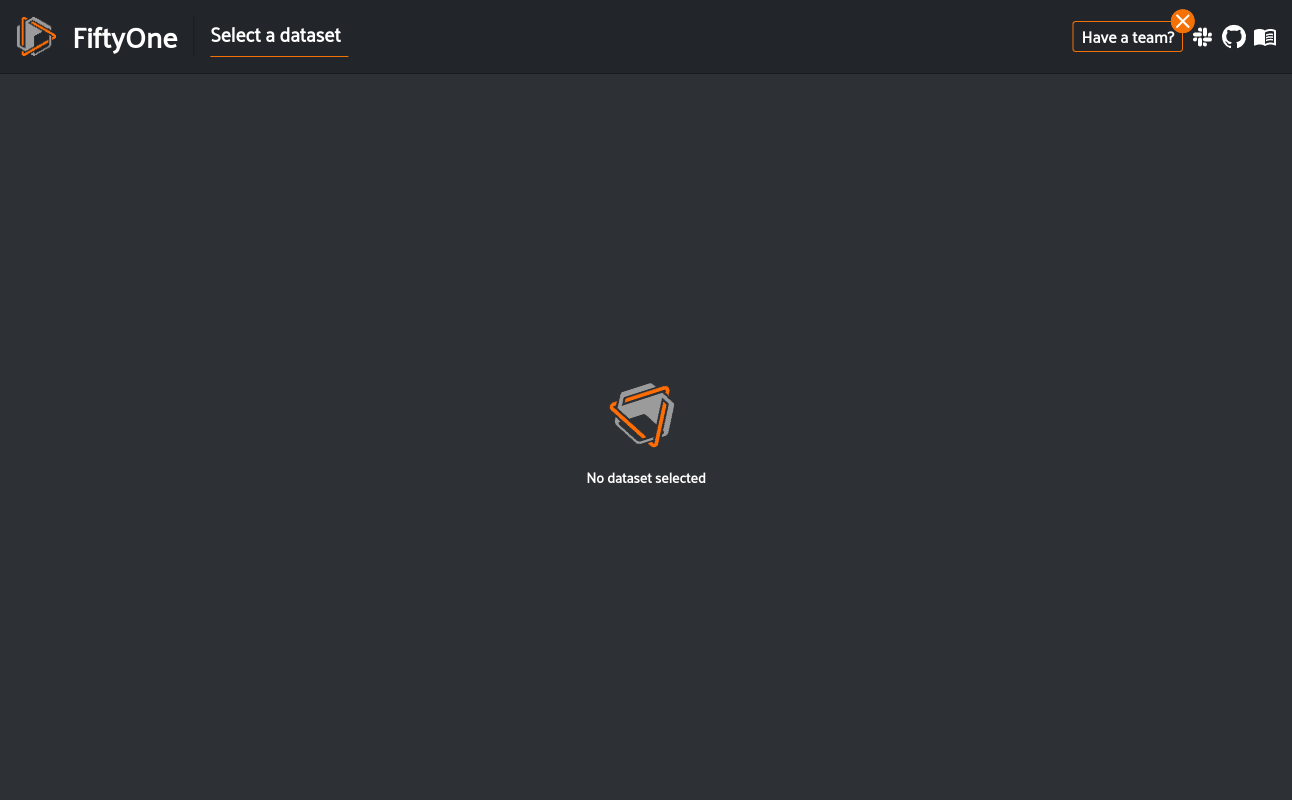

In [17]:
session.clear_dataset()
session.close()

# Make changes to the dataset

### Dataset view

In [ ]:
view = dataset.view()

In [ ]:
session = fo.launch_app(view)

### Selected Images IDs

In [ ]:
selected = session.selected

### Iterate over samples

In [13]:
delete_files = []
edit_files = []

In [14]:
# sample tags
for sample in dataset:
    if 'delete' in sample['tags']:
        delete_files.append(sample['filepath'])
        
# sample tags
for sample in dataset:
    if 'edit' in sample['tags']:
        edit_files.append(sample['filepath'])
        

In [ ]:
# label tags
for sample in dataset:
    new_sample = sample['ground_truth']['detections']
    for spl in new_sample:
        if spl['tags'] == ['add']:
            add_files.append(sample['filepath'])

In [ ]:
len(delete_files)

In [15]:
import numpy as np
np.savetxt('delete.txt', delete_files, fmt='%s')
np.savetxt('edit.txt', edit_files, fmt='%s')

### Delete them from dataset by ID

In [ ]:
for item in delete_ids:
    del dataset[item]

# Brain

In [ ]:
import fiftyone.brain as fob

### Find unique samples

In [ ]:
results = fob.compute_similarity(dataset, brain_key="img_sim")
results.find_unique(100)

In [ ]:
vis_results = fob.compute_visualization(dataset, brain_key="img_vis")

In [ ]:
plot = results.visualize_unique(visualization=vis_results)
plot.show()

In [ ]:
session.plots.attach(plot, name="unique")
session.show()

### Visual similarity

In [ ]:
# index images by similarity
fob.compute_similarity(dataset, brain_key="image_sim")

# launch the app and then select an image and then apply image_sim with sort by similarity button
session = fo.launch_app(dataset)

In [ ]:
# Choose a random image from the dataset
query_id = dataset.take(1).first().id

# Programmatically construct a view containing the 15 most similar images
view = dataset.sort_by_similarity(query_id, k=15, brain_key="image_sim")

# View results in App
session.view = view

# Export the new dataset

In [ ]:
import fiftyone as fo

export_dir = "yolov5-dataset/"
label_field = "ground_truth"  # for example

# The splits to export
splits = ["train", "val", 'test']

# All splits must use the same classes list
classes = ['traffic_sign']

# The dataset or view to export
# We assume the dataset uses sample tags to encode the splits to export
dataset_or_view = dataset

# Export the splits
for split in splits:
    split_view = dataset_or_view.match_tags(split)
    split_view.export(
        export_dir=export_dir,
        dataset_type=fo.types.YOLOv5Dataset,
        label_field=label_field,
        split=split,
        classes=classes,
    )